# **Modelling and Evaluation**

## Objectives

* To answer business requirement 2: The client is interested in predicting if a cherry leaf is healthy or contains powdery mildew.

## Inputs

* inputs/datasets/cherry-leaves/test
* inputs/datasets/cherry-leaves/train
* inputs/datasets/cherry-leaves/validation

## Outputs

* Images distribution plot in all sets
* image augmentation for training
* ML model creation and training
* save the model
* evaluate model performance
* prediction on any given image 

## Additional Comments

* In case you have any additional comments that don't fit in the previous bullets, please state them here. 



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

In [2]:
current_dir = os.getcwd()
current_dir

'/workspaces/milestone-project-mildew-detection-in-cherry-leaves/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [3]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [4]:
current_dir = os.getcwd()
current_dir

'/workspaces/milestone-project-mildew-detection-in-cherry-leaves'

# load the data

Section 1 content

In [5]:
my_data_dir = 'inputs/datasets/cherry-leaves/'
train_path = my_data_dir + '/train'
val_path = my_data_dir + '/validation'
test_path = my_data_dir + '/test'

In [6]:
version = 'v1'
file_path = f'outputs/{version}'

if not os.path.exists(file_path):
    os.makedirs(file_path)
else:
    print(f'Old version {version} is already available. Please create a new version.')

Old version v1 is already available. Please create a new version.


In [7]:
labels = os.listdir(train_path)

print(
    f"Project Labels: {labels}"
)

Project Labels: ['healthy', 'powdery_mildew']


In [8]:
import joblib
version = 'v1'
image_shape = joblib.load(filename=f"outputs/{version}/image_shape.pkl")
image_shape

(256, 256, 3)

---

# Number of images spread amongst the train, test and validation subfolders

Section 2 content

* train - healthy: 1472 images
* train - powdery_mildew: 1472 images
* validation - healthy: 210 images
* validation - powdery_mildew: 210 images
* test - healthy: 422 images
* test - powdery_mildew: 422 images


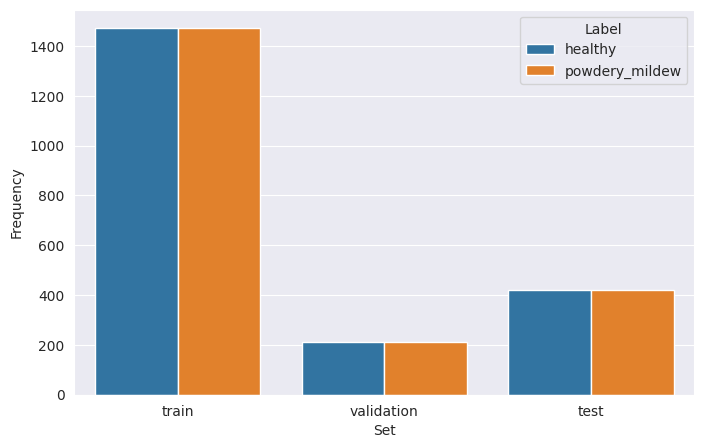

In [9]:
data = []
for folder in ['train', 'validation', 'test']:
    for label in labels:
        folder_path = os.path.join(my_data_dir, folder, label)
        num_images = len(os.listdir(folder_path))
        data.append({
            'Set': folder,
            'Label': label,
            'Frequency': num_images
        })
        print(f"* {folder} - {label}: {num_images} images")

df_freq = pd.DataFrame(data)
sns.set_style("darkgrid")
plt.figure(figsize=(8, 5))
sns.barplot(data=df_freq, x='Set', y='Frequency', hue='Label')
plt.savefig(f'{file_path}/labels_distribution.png', bbox_inches='tight', dpi=150)
plt.show()


---

# Image Augmentation

Due to the dataset not containing a large number of images, I will be using AI image augmentation to synthetically inflate the number of images the ML model can learn from.

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [16]:
augmented_image_data = ImageDataGenerator(rotation_range=20,
                                          width_shift_range=0.10,
                                          height_shift_range=0.10,
                                          shear_range=0.1,
                                          zoom_range=0.1,
                                          horizontal_flip=True,
                                          vertical_flip=True,
                                          fill_mode='nearest',
                                          rescale=1./255
                                          )

In [17]:
batch_size = 20  # Set batch size
train_set = augmented_image_data.flow_from_directory(train_path,
                                                     target_size=image_shape[:2],
                                                     color_mode='rgb',
                                                     batch_size=batch_size,
                                                     class_mode='binary',
                                                     shuffle=True
                                                     )

train_set.class_indices

Found 2944 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

In [18]:
validation_set = ImageDataGenerator(rescale=1./255).flow_from_directory(val_path,
                                                                        target_size=image_shape[:2],
                                                                        color_mode='rgb',
                                                                        batch_size=batch_size,
                                                                        class_mode='binary',
                                                                        shuffle=False
                                                                        )

validation_set.class_indices

Found 420 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

In [19]:
test_set = ImageDataGenerator(rescale=1./255).flow_from_directory(test_path,
                                                                  target_size=image_shape[:2],
                                                                  color_mode='rgb',
                                                                  batch_size=batch_size,
                                                                  class_mode='binary',
                                                                  shuffle=False
                                                                  )

test_set.class_indices

Found 844 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

(20, 256, 256, 3)


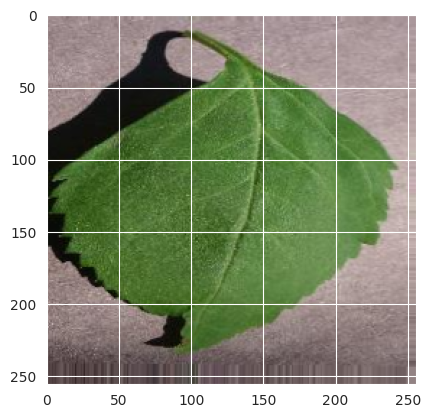

(20, 256, 256, 3)


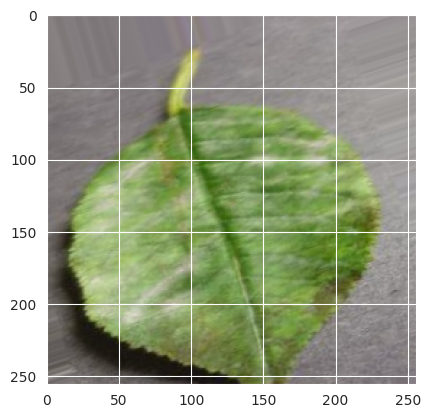

(20, 256, 256, 3)


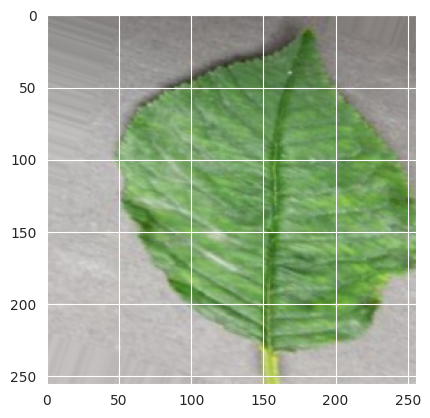

In [15]:
for _ in range(3):
    img, label = train_set.next()
    print(img.shape)  # (1,256,256,3)
    plt.imshow(img[0])
    plt.show()

(20, 256, 256, 3)


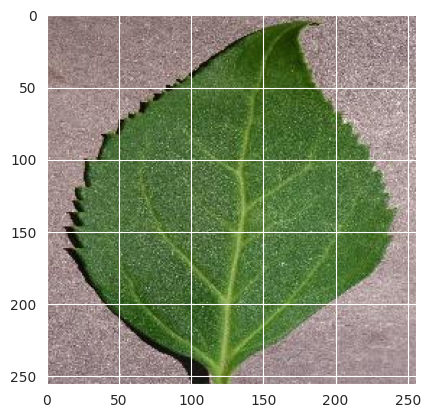

(20, 256, 256, 3)


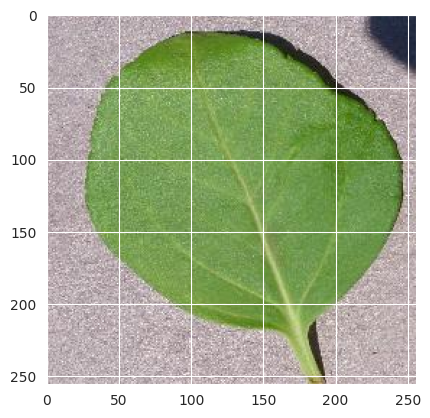

(20, 256, 256, 3)


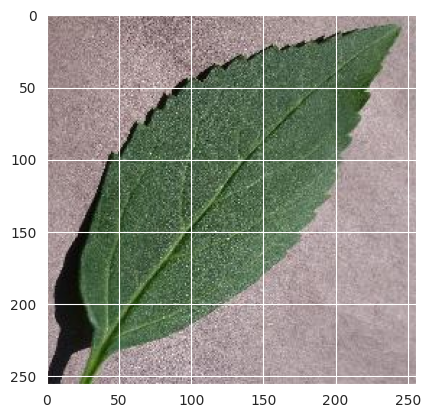

In [16]:
for _ in range(3):
    img, label = validation_set.next()
    print(img.shape)  # (1,256,256,3)
    plt.imshow(img[0])
    plt.show()

(20, 256, 256, 3)


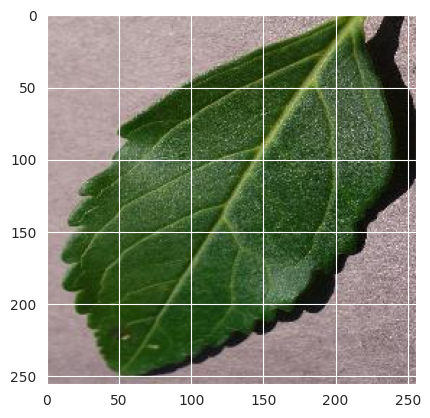

(20, 256, 256, 3)


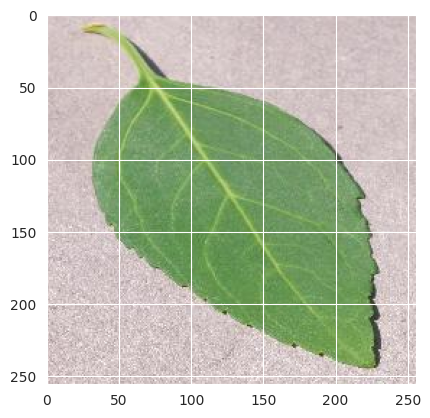

(20, 256, 256, 3)


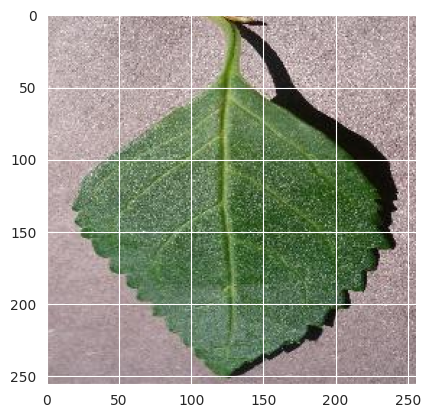

In [17]:
for _ in range(3):
    img, label = test_set.next()
    print(img.shape)  # (1,256,256,3)
    plt.imshow(img[0])
    plt.show()

In [18]:
joblib.dump(value=train_set.class_indices,
            filename=f"{file_path}/class_indices.pkl")

['outputs/v1/class_indices.pkl']

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

I will be using a Convolution Neural Network (CNN) to train the model, this same method was used in the malaria detector walkthrough project, as I feel the two datasets are similair in layout and size, I will be reusing this model and refit for my purposes.

# Model Creation

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [11]:
def create_model():
    """
Conv2D layer: This layer performs convolution operations on the input image to extract important features. It has 32, 64, and 64 filters respectively for the three layers. Each filter is a small matrix of numbers that is applied to the image to extract a certain feature.

MaxPooling2D layer: This layer downsamples the output of the convolutional layer by taking the maximum value in a rectangular neighborhood. This helps to reduce the dimensionality of the feature maps and make the model more efficient.

Flatten layer: This layer flattens the output of the previous layer into a 1D array.

Dense layer: This is a fully connected layer that performs a linear operation on the input followed by a non-linear activation function (in this case, ReLU). The output of this layer is a high-level feature representation of the input image.

Dropout layer: This layer randomly drops out some of the neurons in the previous layer during training to prevent overfitting.

Dense layer: This is the output layer that performs a final linear transformation followed by a sigmoid activation function to output the probability of the input image belonging to a certain class.
    """
    model = Sequential()

    model.add(Conv2D(filters=32, kernel_size=(3, 3),
              input_shape=image_shape, activation='relu', ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=64, kernel_size=(3, 3),
              input_shape=image_shape, activation='relu', ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=64, kernel_size=(3, 3),
              input_shape=image_shape, activation='relu', ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))

    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    return model

In [12]:
create_model().summary()

2023-05-12 12:09:58.206764: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
____________________________________________

In [13]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3)

In [20]:
model = create_model()
model.fit(train_set,
          epochs=10,
          steps_per_epoch=len(train_set.classes) // batch_size,
          validation_data=validation_set,
          callbacks=[early_stop],
          verbose=1
          )

2023-05-12 12:10:52.722535: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
Epoch 1/10
147/147 [==============================] - 277s 2s/step - loss: 0.2707 - accuracy: 0.8728 - val_loss: 0.0162 - val_accuracy: 1.0000
Epoch 2/10
147/147 [==============================] - 273s 2s/step - loss: 0.0489 - accuracy: 0.9870 - val_loss: 0.0077 - val_accuracy: 0.9976
Epoch 3/10
147/147 [==============================] - 270s 2s/step - loss: 0.0858 - accuracy: 0.9713 - val_loss: 0.0338 - val_accuracy: 0.9833
Epoch 4/10
147/147 [==============================] - 272s 2s/step - loss: 0.0349 - accuracy: 0.9921 - val_loss: 0.0487 - val_accuracy: 0.9833
Epoch 5/10
147/147 [==============================] - 269s 2s/step - loss: 0.0431 - accuracy: 0.9894 - val_loss: 0.0404 - val_accuracy: 0.9810


In [21]:
model.save('outputs/v1/leaf_identifier_model.h5')

---

# Model Performance

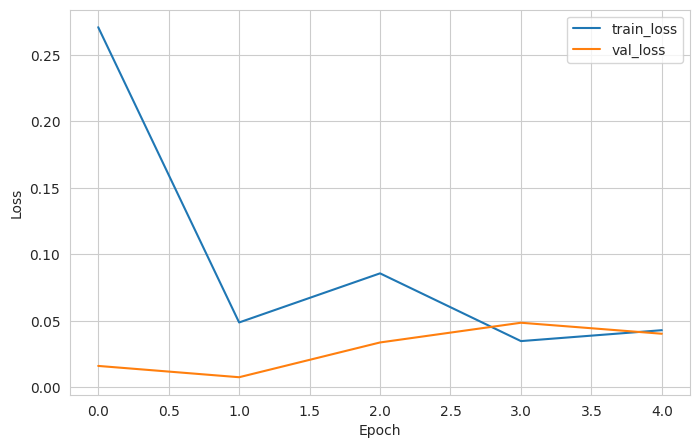

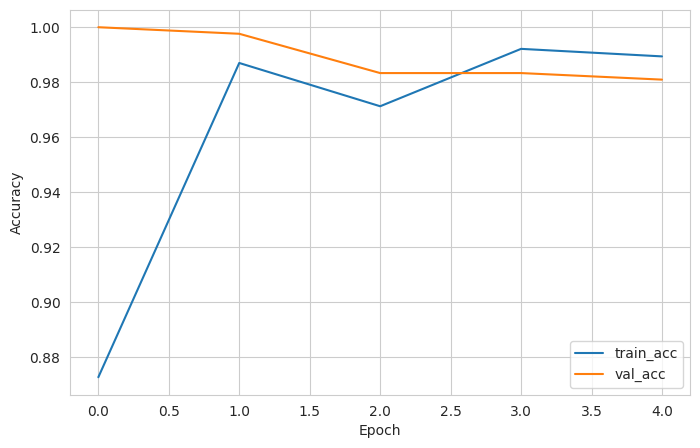

In [23]:
# Get the model's history
history = model.history.history

# Plot the loss curve
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(history['loss'], label='train_loss')
ax.plot(history['val_loss'], label='val_loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.legend()
plt.savefig(f'{file_path}/model_training_losses.png', bbox_inches='tight', dpi=150)
plt.show()

# Plot the accuracy curve
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(history['accuracy'], label='train_acc')
ax.plot(history['val_accuracy'], label='val_acc')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.legend()
plt.savefig(f'{file_path}/model_training_acc.png', bbox_inches='tight', dpi=150)
plt.show()


## Model Evaluation

In [25]:
from keras.models import load_model
model = load_model('outputs/v1/leaf_identifier_model.h5')

In [26]:
evaluation = model.evaluate(test_set)

43/43 [==============================] - 19s 442ms/step - loss: 0.0727 - accuracy: 0.9834


In [27]:
joblib.dump(value=evaluation,
            filename=f"outputs/v1/evaluation.pkl")

['outputs/v1/evaluation.pkl']

# Prediction

Image shape: (256, 256), Image mode: RGB


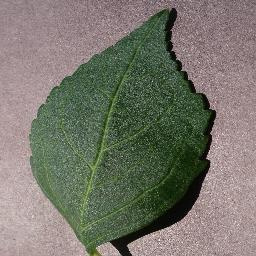

In [33]:
from tensorflow.keras.preprocessing import image

pointer = 66
label = labels[0]

pil_image = image.load_img(test_path + '/' + label + '/' + os.listdir(test_path+'/' + label)[pointer],
                           target_size=image_shape, color_mode='rgb')
print(f'Image shape: {pil_image.size}, Image mode: {pil_image.mode}')
pil_image

In [29]:
my_image = image.img_to_array(pil_image)
my_image = np.expand_dims(my_image, axis=0)/255
print(my_image.shape)

(1, 256, 256, 3)


In [30]:
pred_proba = model.predict(my_image)[0, 0]

target_map = {v: k for k, v in train_set.class_indices.items()}
pred_class = target_map[pred_proba > 0.5]

if pred_class == target_map[0]:
    pred_proba = 1 - pred_proba

print(pred_proba)
print(pred_class)

0.9999999999743853
healthy


# Push files to Repo

* If you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [34]:
!cat .gitignore

core.Microsoft*
core.mongo*
core.python*
env.py
__pycache__/
*.py[cod]
node_modules/
.github/
cloudinary_python.txt
kaggle.json

In [35]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	jupyter_notebooks/3 - Modeling and Eval.ipynb
	outputs/v1/class_indices.pkl
	outputs/v1/evaluation.pkl
	outputs/v1/labels_distribution.png
	outputs/v1/leaf_identifier_model.h5
	outputs/v1/model_training_acc.png
	outputs/v1/model_training_losses.png

nothing added to commit but untracked files present (use "git add" to track)
